In [1]:
import os
import os.path
import sys
d = os.path.join(os.getcwd(), '..')
print(d)
sys.path.append(d)

C:\Users\Zachary\Documents\GitHub\COMP 3201 - TSP Evolutionary Algorithm\src\..


In [2]:
import matplotlib.pyplot as plt
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure as Figure
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# https://pandas.pydata.org/pandas-docs/stable/visualization.html
# http://pandas.pydata.org/pandas-docs/version/0.13/visualization.html
# https://matplotlib.org/users/pyplot_tutorial.html

# Set up the style of the graphs, and display a sample graph
graph_style = 5
plt.style.use(plt.style.available[graph_style])  # 5, 14, 22
sns.set_context("paper")

In [3]:
# Standard Imports

# These should not be changed, as they are used to set the 'constant'
# global variables for each module.
from EA_Methods.List_Rep import ParentSelectionMethods as PSM
from EA_Methods.List_Rep import RecombinationMethods as RM
from EA_Methods.List_Rep import MutationMethods as MM
from EA_Methods.List_Rep import SurvivorSelectionMethods as SSM
from random import shuffle


# Modular Imports

# Modular Problem Definition
# By changing these imports, you can easily redifine the problem you are attempting
# to solve, without having to re-write much of the code.
from Setups.TSP.TSP_LST import read_tsp_file as parse_file
from Setups.TSP import TSP_LST as DEF

# Modular Function Definitions
# By swapping out which functions are imported, but keeping the aliases,
# the entire structure of the EA algorithm can be changed without rewriting code
# in the main method.
from Setups.TSP.TSP_LST import random_initialization as initialize
from Setups.TSP.TSP_LST import euclidean_distance as eval_fitness
from EA_Methods.List_Rep.ParentSelectionMethods import tournament as parent_selection
from EA_Methods.List_Rep.RecombinationMethods import recombination_cut_crossover as generate_offspring
from EA_Methods.List_Rep.MutationMethods import permutation_swap as apply_mutation
from EA_Methods.List_Rep.SurvivorSelectionMethods import replacement as select_survivors


# Global Variable Initialization
FILENUM             =      1  # Changing this variable changes which file to parse.
genome_length       =      parse_file(FILENUM)
generation_limit    =      10000
population_size     =      60
mating_pool_size    =      population_size//2 if (population_size//2) % 2 == 0 else (population_size//2)+1  # has to be even

tournament_size     =      population_size//10
crossover_rate      =      0.9
crossover_point     =      genome_length//3
mutation_rate       =      0.2


# Key Variable Setters
# These functions typically do not need to be changed, and simply
# allow easy changing of all rates and variables from this cell.
PSM.set_tournament_size(tournament_size)
RM.set_crossover_point(crossover_point)
RM.set_crossover_rate(crossover_rate)
MM.set_mutation_rate(mutation_rate)
DEF.set_fitness_function(eval_fitness)

DEF.DATAFRAME

,Longitude (Range shifted),Latitude (Range shifted)
0,-3633.33335,-3314.58335
1,-3600.00005,-3247.91665
2,449.99995,-2847.91665
3,-683.33335,-2547.91665
4,-1500.00005,-2547.91665
5,-3033.33335,-2547.91665
6,333.33335,-1964.58335
7,-833.33335,-1564.58335
8,749.99995,-1464.58335
9,-2400.00005,-531.24995


In [4]:
def evolution_algorithm(maximize, print_gens=True, display_freq=None):
    if display_freq is None: display_freq = generation_limit
    
    # Setting dynamic standard for 'best'
    op = max if maximize else min
    PSM.set_op(op)
    SSM.set_op(op)

    # Initialize Population
    population, fitness = initialize(population_size, genome_length)
    
    if print_gens:
        # TODO - Better handle demonstration output.
        DEF.start_up_display()

    # Evolution starts
    for generation in range(generation_limit):

        # Generation Info
        if print_gens and (generation % display_freq == display_freq - 1):
            # TODO - Better handle demonstration output.
            op_fit = op(fitness)
            optimal_solutions = [i + 1 for i in range(population_size) if fitness[i] == op_fit]
            #TSP.generation_display(optimal_solutions[0])
            print("Generation: {}\n - Best fitness: {}\n - Avg. fitness: {}\n - Number of optimal solutions: {}/{}\n".format(
                generation+1, op(fitness), sum(fitness)/len(fitness), len(optimal_solutions), population_size)
            )

        # Parent Selection
        parents_index = parent_selection(fitness, mating_pool_size)

        # Generate Offspring (Recombination)
        offspring = generate_offspring(population, parents_index)

        # Mutation Application
        offspring = [apply_mutation(i) for i in offspring]
        offspring_fitness = [eval_fitness(i) for i in offspring]

        # Survivor Selection
        population, fitness = select_survivors(population, fitness, offspring, offspring_fitness)
    # Evolution ends
        
    # Final Fitness Info
    op_fit = op(fitness)
    optimal_solutions = [i + 1 for i in range(population_size) if fitness[i] == op_fit]
    print("\nBest solution fitness:", op_fit, "\nNumber of optimal solutions: ", len(optimal_solutions), '/', population_size)
    print("Best solution indexes:\n", optimal_solutions)
    print('\n\n\n\n\n\n')



Displaying information every 500 generations.


Generation: 500
 - Best fitness: 34082.271713487215
 - Avg. fitness: 35326.48575946386
 - Number of optimal solutions: 52/60

Generation: 1000
 - Best fitness: 34082.271713487215
 - Avg. fitness: 35198.61618958926
 - Number of optimal solutions: 54/60

Generation: 1500
 - Best fitness: 34082.271713487215
 - Avg. fitness: 36152.95717239115
 - Number of optimal solutions: 48/60

Generation: 2000
 - Best fitness: 34082.271713487215
 - Avg. fitness: 35017.732378677494
 - Number of optimal solutions: 54/60

Generation: 2500
 - Best fitness: 34082.271713487215
 - Avg. fitness: 34924.76029773439
 - Number of optimal solutions: 55/60

Generation: 3000
 - Best fitness: 34082.271713487215
 - Avg. fitness: 35749.512331908605
 - Number of optimal solutions: 53/60

Generation: 3500
 - Best fitness: 34082.271713487215
 - Avg. fitness: 34574.877597882754
 - Number of optimal solutions: 57/60

Generation: 4000
 - Best fitness: 34082.271713487215
 - Avg

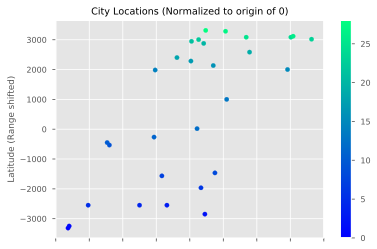

In [5]:
freq = min(int(generation_limit * 0.1), 500)
print('\n\nDisplaying information every {} generations.\n\n'.format(freq))
evolution_algorithm(False, True, freq)

## Helper Functions

In [6]:
# Sahara
parse_file(1)
TSP.start_up_display()
#TSP.brute_force_solver()

NameError: name 'TSP' is not defined

In [ ]:
# Uraguay
parse_file(2)
TSP.start_up_display()
#TSP.brute_force_solver()

In [ ]:
# Canada
parse_file(3)
TSP.start_up_display()
#TSP.brute_force_solver()